
# 作業: 
    
    (1)以, Adam, 為例, 調整 batch_size, epoch , 觀察accurancy, loss 的變化
    
    (2)以同一模型, 分別驗證 SGD, Adam, Rmsprop 的 accurancy

In [1]:
import keras
#from keras.datasets import cifar10
from keras.datasets import mnist 
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import optimizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy 


Using TensorFlow backend.


In [2]:
# 第一步：選擇模型, 順序模型是多個網絡層的線性堆疊
model = Sequential()

# 第二步：構建網絡層
model.add(Dense( 500,input_shape=(784,))) # 輸入層，28*28=784   
model.add(Activation('relu')) # 激活函數是relu   

model.add(Dense( 500)) # 隱藏層節點500個   
model.add(Activation('relu'))  

model.add(Dense( 500)) # 隱藏層節點500個   
model.add(Activation('relu'))  

model.add(Dense( 500)) # 隱藏層節點500個   
model.add(Activation('relu'))  

model.add(Dense( 10)) # 輸出結果是10個類別，所以維度是10   
model.add(Activation('softmax')) # 最後一層用softmax作為激活函數

In [3]:
# 模型建立完成後，統計參數總量
print("Total Parameters：%d" % model.count_params())

Total Parameters：1149010


In [4]:
# 輸出模型摘要資訊
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               392500    
_________________________________________________________________
activation_1 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
activation_2 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 500)               250500    
_________________________________________________________________
activation_3 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 500)               250500    
__________

In [5]:
 '''
 SGD(隨機梯度下降) - Arguments
lr: float >= 0. Learning rate.
momentum: float >= 0. Parameter that accelerates SGD in the relevant direction and dampens oscillations.
decay: float >= 0. Learning rate decay over each update.
nesterov: boolean. Whether to apply Nesterov momentum.
'''

'''
RMSprop- Arguments
lr: float >= 0. Learning rate.
rho: float >= 0.
epsilon: float >= 0. Fuzz factor. If None, defaults to K.epsilon().
decay: float >= 0. Learning rate decay over each update.
'''

'\nRMSprop- Arguments\nlr: float >= 0. Learning rate.\nrho: float >= 0.\nepsilon: float >= 0. Fuzz factor. If None, defaults to K.epsilon().\ndecay: float >= 0. Learning rate decay over each update.\n'

In [6]:
'''
Adam- Arguments
'''
# 第三步：編譯, 
opt = keras.optimizers.Adam(lr=0.001, epsilon=None, decay=0.0)
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [7]:
#  第四步：資料分割
# 使用Keras自帶的mnist工具讀取數據（第一次需要聯網）
(X_train, y_train), (X_test, y_test) = mnist.load_data() 

# 由於mist的輸入數據維度是(num, 28 , 28)，這裡需要把後面的維度直接拼起來變成784維   
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2 ])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2 ])  
Y_train = (numpy.arange(10) == y_train[:, None]).astype(int)
Y_test = (numpy.arange(10) == y_test[:, None]).astype(int)


In [8]:
'''
   宣告並設定
   batch_size：對總的樣本數進行分組，每組包含的樣本數量
   epochs ：訓練次數
''' 
batch_size = 256
epochs = 20

In [9]:
# 第五步：訓練, 修正 model 參數
#Blas GEMM launch failed , 避免動態分配GPU / CPU, 出現問題
import tensorflow as tf
#gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.5)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

history = model.fit(X_train,Y_train,batch_size = batch_size, epochs=epochs, shuffle=True,verbose=2,validation_split=0.3 )

Train on 42000 samples, validate on 18000 samples
Epoch 1/20
 - 4s - loss: 2.8874 - acc: 0.8195 - val_loss: 2.8956 - val_acc: 0.8194
Epoch 2/20
 - 3s - loss: 2.8932 - acc: 0.8195 - val_loss: 2.8956 - val_acc: 0.8194
Epoch 3/20
 - 3s - loss: 2.8932 - acc: 0.8195 - val_loss: 2.8956 - val_acc: 0.8194
Epoch 4/20
 - 3s - loss: 2.8932 - acc: 0.8195 - val_loss: 2.8956 - val_acc: 0.8194
Epoch 5/20
 - 3s - loss: 2.8932 - acc: 0.8195 - val_loss: 2.8956 - val_acc: 0.8194
Epoch 6/20
 - 3s - loss: 2.8932 - acc: 0.8195 - val_loss: 2.8956 - val_acc: 0.8194
Epoch 7/20
 - 3s - loss: 2.8932 - acc: 0.8195 - val_loss: 2.8956 - val_acc: 0.8194
Epoch 8/20
 - 3s - loss: 2.8932 - acc: 0.8195 - val_loss: 2.8956 - val_acc: 0.8194
Epoch 9/20
 - 3s - loss: 2.8932 - acc: 0.8195 - val_loss: 2.8956 - val_acc: 0.8194
Epoch 10/20
 - 3s - loss: 2.8932 - acc: 0.8195 - val_loss: 2.8956 - val_acc: 0.8194
Epoch 11/20
 - 3s - loss: 2.8932 - acc: 0.8195 - val_loss: 2.8956 - val_acc: 0.8194
Epoch 12/20
 - 3s - loss: 2.8932 - 

In [10]:
# 第六步：輸出
print ( " test set " )
scores = model.evaluate(X_test,Y_test,batch_size=200,verbose= 0)
print ( "" )
#print ( " The test loss is %f " % scores)
print ( " The test loss is %f ", scores)
result = model.predict(X_test,batch_size=200,verbose= 0)

result_max = numpy.argmax(result, axis = 1 )
test_max = numpy.argmax(Y_test, axis = 1 )

result_bool = numpy.equal(result_max, test_max)
true_num = numpy.sum(result_bool)
print ( "" )
print ( " The accuracy of the model is %f " % (true_num/len(result_bool)))

 test set 

 The test loss is %f  [2.8912137079238893, 0.8196400165557861]

 The accuracy of the model is 0.098200 


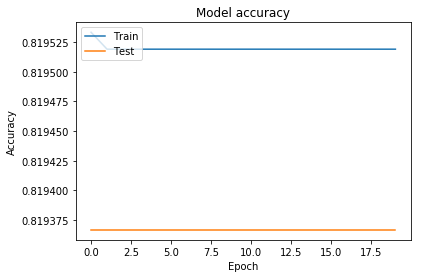

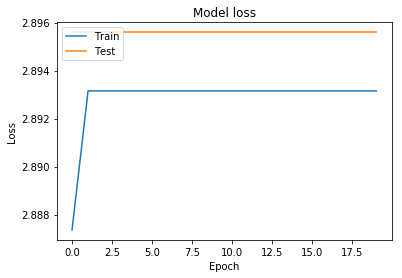

In [11]:
import matplotlib.pyplot as plt

%matplotlib inline

# history = model.fit(x, y, validation_split=0.25, epochs=50, batch_size=16, verbose=1)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [12]:
 '''
 SGD(隨機梯度下降) - Arguments
lr: float >= 0. Learning rate.
momentum: float >= 0. Parameter that accelerates SGD in the relevant direction and dampens oscillations.
decay: float >= 0. Learning rate decay over each update.
nesterov: boolean. Whether to apply Nesterov momentum.
'''

'\nSGD(隨機梯度下降) - Arguments\nlr: float >= 0. Learning rate.\nmomentum: float >= 0. Parameter that accelerates SGD in the relevant direction and dampens oscillations.\ndecay: float >= 0. Learning rate decay over each update.\nnesterov: boolean. Whether to apply Nesterov momentum.\n'

In [13]:
'''
SGD- Arguments
'''
# 第三步：編譯, 
opt = keras.optimizers.SGD(lr=0.01, momentum=0.1, decay=0.1, nesterov=False)
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [14]:
history = model.fit(X_train,Y_train,batch_size = batch_size, epochs=epochs, shuffle=True,verbose=2,validation_split=0.3 )

Train on 42000 samples, validate on 18000 samples
Epoch 1/20
 - 3s - loss: 2.8932 - acc: 0.8195 - val_loss: 2.8956 - val_acc: 0.8194
Epoch 2/20
 - 3s - loss: 2.8932 - acc: 0.8195 - val_loss: 2.8956 - val_acc: 0.8194
Epoch 3/20
 - 3s - loss: 2.8932 - acc: 0.8195 - val_loss: 2.8956 - val_acc: 0.8194
Epoch 4/20
 - 3s - loss: 2.8932 - acc: 0.8195 - val_loss: 2.8956 - val_acc: 0.8194
Epoch 5/20
 - 3s - loss: 2.8932 - acc: 0.8195 - val_loss: 2.8956 - val_acc: 0.8194
Epoch 6/20
 - 3s - loss: 2.8932 - acc: 0.8195 - val_loss: 2.8956 - val_acc: 0.8194
Epoch 7/20
 - 3s - loss: 2.8932 - acc: 0.8195 - val_loss: 2.8956 - val_acc: 0.8194
Epoch 8/20
 - 2s - loss: 2.8932 - acc: 0.8195 - val_loss: 2.8956 - val_acc: 0.8194
Epoch 9/20
 - 3s - loss: 2.8932 - acc: 0.8195 - val_loss: 2.8956 - val_acc: 0.8194
Epoch 10/20
 - 2s - loss: 2.8932 - acc: 0.8195 - val_loss: 2.8956 - val_acc: 0.8194
Epoch 11/20
 - 2s - loss: 2.8932 - acc: 0.8195 - val_loss: 2.8956 - val_acc: 0.8194
Epoch 12/20
 - 3s - loss: 2.8932 - 

In [15]:
# 第六步：輸出
print ( " test set " )
scores = model.evaluate(X_test,Y_test,batch_size=200,verbose= 0)
print ( "" )
#print ( " The test loss is %f " % scores)
print ( " The test loss is %f ", scores)
result = model.predict(X_test,batch_size=200,verbose= 0)

result_max = numpy.argmax(result, axis = 1 )
test_max = numpy.argmax(Y_test, axis = 1 )

result_bool = numpy.equal(result_max, test_max)
true_num = numpy.sum(result_bool)
print ( "" )
print ( " The accuracy of the model is %f " % (true_num/len(result_bool)))

 test set 

 The test loss is %f  [2.8912137079238893, 0.8196400165557861]

 The accuracy of the model is 0.098200 


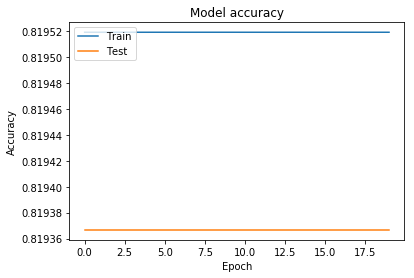

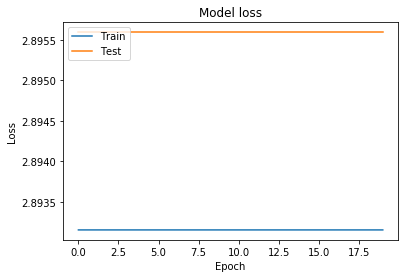

In [16]:
import matplotlib.pyplot as plt

%matplotlib inline

# history = model.fit(x, y, validation_split=0.25, epochs=50, batch_size=16, verbose=1)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [17]:
'''
RMSprop- Arguments
lr: float >= 0. Learning rate.
rho: float >= 0.
epsilon: float >= 0. Fuzz factor. If None, defaults to K.epsilon().
decay: float >= 0. Learning rate decay over each update.
'''

'\nRMSprop- Arguments\nlr: float >= 0. Learning rate.\nrho: float >= 0.\nepsilon: float >= 0. Fuzz factor. If None, defaults to K.epsilon().\ndecay: float >= 0. Learning rate decay over each update.\n'

In [18]:
'''
RMSprop- Arguments
'''
# 第三步：編譯, 
opt = keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [19]:
history = model.fit(X_train,Y_train,batch_size = batch_size, epochs=epochs, shuffle=True,verbose=2,validation_split=0.3 )

Train on 42000 samples, validate on 18000 samples
Epoch 1/20
 - 4s - loss: 2.8932 - acc: 0.8195 - val_loss: 2.8956 - val_acc: 0.8194
Epoch 2/20
 - 3s - loss: 2.8932 - acc: 0.8195 - val_loss: 2.8956 - val_acc: 0.8194
Epoch 3/20
 - 3s - loss: 2.8932 - acc: 0.8195 - val_loss: 2.8956 - val_acc: 0.8194
Epoch 4/20
 - 3s - loss: 2.8932 - acc: 0.8195 - val_loss: 2.8956 - val_acc: 0.8194
Epoch 5/20
 - 3s - loss: 2.8932 - acc: 0.8195 - val_loss: 2.8956 - val_acc: 0.8194
Epoch 6/20
 - 3s - loss: 2.8932 - acc: 0.8195 - val_loss: 2.8956 - val_acc: 0.8194
Epoch 7/20
 - 3s - loss: 2.8932 - acc: 0.8195 - val_loss: 2.8956 - val_acc: 0.8194
Epoch 8/20
 - 3s - loss: 2.8932 - acc: 0.8195 - val_loss: 2.8956 - val_acc: 0.8194
Epoch 9/20
 - 3s - loss: 2.8932 - acc: 0.8195 - val_loss: 2.8956 - val_acc: 0.8194
Epoch 10/20
 - 3s - loss: 2.8932 - acc: 0.8195 - val_loss: 2.8956 - val_acc: 0.8194
Epoch 11/20
 - 3s - loss: 2.8932 - acc: 0.8195 - val_loss: 2.8956 - val_acc: 0.8194
Epoch 12/20
 - 3s - loss: 2.8932 - 

In [20]:
# 第六步：輸出
print ( " test set " )
scores = model.evaluate(X_test,Y_test,batch_size=200,verbose= 0)
print ( "" )
#print ( " The test loss is %f " % scores)
print ( " The test loss is %f ", scores)
result = model.predict(X_test,batch_size=200,verbose= 0)

result_max = numpy.argmax(result, axis = 1 )
test_max = numpy.argmax(Y_test, axis = 1 )

result_bool = numpy.equal(result_max, test_max)
true_num = numpy.sum(result_bool)
print ( "" )
print ( " The accuracy of the model is %f " % (true_num/len(result_bool)))

 test set 

 The test loss is %f  [2.8912137079238893, 0.8196400165557861]

 The accuracy of the model is 0.098200 


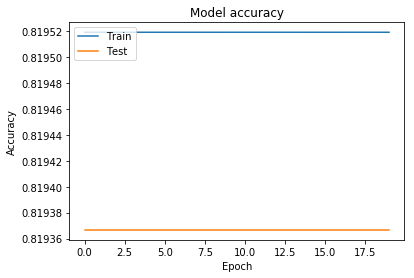

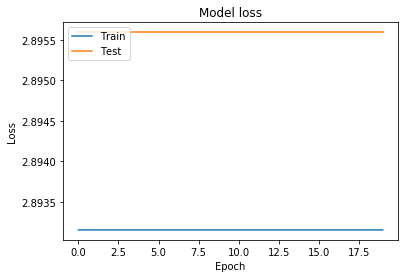

In [21]:
import matplotlib.pyplot as plt

%matplotlib inline

# history = model.fit(x, y, validation_split=0.25, epochs=50, batch_size=16, verbose=1)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()